In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pandas import read_table
from models.dga_model import DGAClassifier

In [3]:
test_df = read_table('data/dga_domain_testing_3000.csv', sep=',')
# test_df.index = test_df.domain
test_df.head()

,label,domain
0,benign,b.alot.com
1,dga,o1jki4us41vya9t8t3fiux3a.net
2,benign,freesexmatch.com
3,benign,columbiasc.edu
4,benign,a184-84-91-165.deploy.static.akamaitechnologie...


In [4]:
domains = list(test_df.domain)
labels = list(test_df.label)

In [5]:
dga_classifier = DGAClassifier()
dga_classifier.train(domains, labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2 
[CV]  rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2, score=0.907000 -   0.8s
[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2 
[CV]  rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2, score=0.891000 -   0.8s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    1.6s



[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2 
[CV]  rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=2, score=0.894000 -   0.8s
[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=3 
[CV]  rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=3, score=0.906000 -   0.8s
[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=3 
[CV]  rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=200, rfc__min_samples_leaf=3, score=0.895000 -   0.8s
[CV] rfc__criterion=entropy, rfc__min_samples_split=1, rfc__min_weight_fraction_leaf=0, rfc__n_estimators=20

[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s finished



grid results:  [mean: 0.89733, std: 0.00694, params: {'rfc__criterion': 'entropy', 'rfc__min_samples_split': 1, 'rfc__min_weight_fraction_leaf': 0, 'rfc__n_estimators': 200, 'rfc__min_samples_leaf': 2}, mean: 0.89767, std: 0.00602, params: {'rfc__criterion': 'entropy', 'rfc__min_samples_split': 1, 'rfc__min_weight_fraction_leaf': 0, 'rfc__n_estimators': 200, 'rfc__min_samples_leaf': 3}]
Trained to a top score of:  0.897666666667
Best model had params:  {'rfc__criterion': 'entropy', 'rfc__min_samples_split': 1, 'rfc__min_weight_fraction_leaf': 0, 'rfc__n_estimators': 200, 'rfc__min_samples_leaf': 3}


Pipeline(steps=[('dfe', DomainFeatureExtractor()), ('df_to_records', DFtoRecordsTransformer()), ('vectorizer', DictVectorizer(dtype=<type 'numpy.float64'>, separator='=', sort=True,
        sparse=True)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)), ...obs=-1,
            oob_score=False, random_state=519447, verbose=0,
            warm_start=False))])

In [6]:
preds = dga_classifier.predict(domains[:10])
preds

{'1lc6v7uxf56u4al0c5a1dyzzyq.net': 'dga',
 '1sdpn303yh7sp1ps3amy1fv3ugw.net': 'dga',
 'a184-84-91-165.deploy.static.akamaitechnologies.com': 'benign',
 'b.alot.com': 'benign',
 'columbiasc.edu': 'benign',
 'dgrmnaqpdrbk.biz': 'dga',
 'freesexmatch.com': 'benign',
 'o1jki4us41vya9t8t3fiux3a.net': 'dga',
 'playtech.com.br': 'benign',
 'san-petersburgo.com': 'benign'}

In [7]:
# Query model for probability scores.  
preds = dga_classifier.predict_proba(domains[:10])
preds

{'1lc6v7uxf56u4al0c5a1dyzzyq.net': {'benign': 0.0, 'dga': 1.0},
 '1sdpn303yh7sp1ps3amy1fv3ugw.net': {'benign': 0.0, 'dga': 1.0},
 'a184-84-91-165.deploy.static.akamaitechnologies.com': {'benign': 0.86964967542636162,
  'dga': 0.13035032457363824},
 'b.alot.com': {'benign': 0.9994921455424276, 'dga': 0.00050785445757250275},
 'columbiasc.edu': {'benign': 0.97391673011502278,
  'dga': 0.026083269884977306},
 'dgrmnaqpdrbk.biz': {'benign': 0.027594471080159111,
  'dga': 0.972405528919841},
 'freesexmatch.com': {'benign': 0.94648795983745881,
  'dga': 0.053512040162541102},
 'o1jki4us41vya9t8t3fiux3a.net': {'benign': 0.11899967744423284,
  'dga': 0.8810003225557671},
 'playtech.com.br': {'benign': 0.54238700358867231,
  'dga': 0.45761299641132774},
 'san-petersburgo.com': {'benign': 0.76389349746832735,
  'dga': 0.23610650253167317}}

In [8]:
# Save model to a file
test_fn = 'DGAClassifierTest__save_load_test.pkl.tmp'
dga_classifier.save(test_fn)

In [9]:
# Load from a saved model file
loaded_dga_classifier = DGAClassifier.load(test_fn)

# DGA Classifier Model Evaluation

In [10]:
eval_df = test_df = read_table('data/dga_domain_split_validation.csv', sep=',')
eval_domains = list(eval_df.domain)
eval_labels = list(eval_df.label)

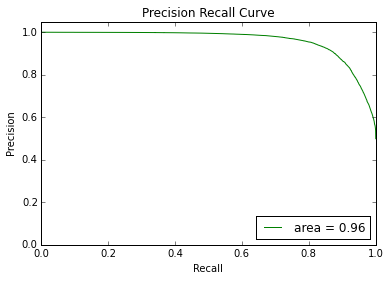

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
 
pred_probs = dga_classifier.predict_proba(eval_domains)
scores = [pred_probs[d]['dga'] for d in eval_domains]

y_true = [1 if l=='dga' else 0 for l in eval_labels]
precision, recall, _ = precision_recall_curve(y_true, scores, pos_label=1)
average_precision = average_precision_score(y_true, scores)

plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

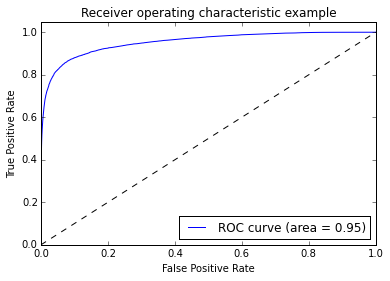

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
pred = dga_classifier.predict(eval_domains)
y_pred = [pred[d]=='dga' for d in eval_domains]
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[236218,  27203],
       [ 31090, 231244]])

In [14]:
conf_matrix / float(len(eval_domains))

array([[ 0.44929292,  0.05174083],
       [ 0.05913401,  0.43983224]])

In [15]:
from pandas import concat, Series
roc_lines = concat([Series(fpr, name='fp_rate'), Series(tpr, name='tp_rate'), Series(threshold, name='threshold')], axis=1)

## What probability threashold should I use for maximal True Positive Rate if my False Positive Rate cannot exceed 1%?

In [16]:
roc_lines[roc_lines.fp_rate<.01].sort('tp_rate', ascending=False).head()

,fp_rate,tp_rate,threshold
64560,0.009999,0.659083,0.896921
64559,0.009999,0.659080,0.896923
64558,0.009999,0.659076,0.896927
64557,0.009995,0.658958,0.896929
64556,0.009995,0.658954,0.896934


###If my False Positive Rate tolerance is 1%, then my True Positive Rate will be 55% and my probability or classification threshold will need to be 0.861342